In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)
from helper_functions import *


ticker = 'TSLA'
date_range = ['2020-01-01', '2021-03-05']
date = '2021-03-10'
window = 'year1month4'
interval = '5min'
website = 'alphavantage'

In [2]:
price = load_price_df(ticker, date)
df = load_news_df(ticker, date_range, website='finnhub')
price_timestamp(df)
get_prices(df, price)
df

,headline,related,source,summary,price_ts,price,price_1d,price_1h
datetime,,,,,,,,
2021-03-05 07:30:41,Investing In Intangible Assets Revisited,TSLA,seekingalpha.com,"Intangible assets are becoming an increasingly important portion of not only company balance sheets, but also their ability to grow and generate profits.",2021-03-04 18:00:00,614.6000,596.520,614.6000
2021-03-05 00:00:00,"Tesla Should Sell Its Bitcoin and Buy Back Shares To Create 'Positive Momentum,' Says Analyst",TSLA,benzinga,"Tesla Inc (NASDAQ: TSLA) could create a “positive momentum” if its sold its Bitcoin (CRYPTO: BTC) holdings and initiated a buyback of its stock, according to...",2021-03-04 18:00:00,614.6000,596.520,614.6000
2021-03-05 00:00:00,"Tesla Should Sell Its Bitcoin and Buy Back Shares To Create 'Positive Momentum,' Says Analyst",TSLA,benzinga,"Tesla Inc (NASDAQ: TSLA) could create a “positive momentum” if its sold its Bitcoin (CRYPTO: BTC) holdings and initiated a buyback of its stock, according to...",2021-03-04 18:00:00,614.6000,596.520,614.6000
2021-03-04 21:33:00,Tesla Inc. stock underperforms Thursday when compared to competitors,TSLA,marketwatch,"Shares of Tesla Inc. slid 4.86% to $621.44 Thursday, on what proved to be an all-around grim trading session for the stock market, with the NASDAQ Composite...",2021-03-04 18:00:00,614.6000,596.520,614.6000
2021-03-04 13:48:00,EV Stocks NIO and Tesla Are Falling Again. It’s Not the Companies’ Fault.,TSLA,MarketWatch,"High-flying shares of electric-vehicle makers are falling yet again. Recent declines have been jarring, but external factors are to blame.",2021-03-04 13:50:00,605.7659,599.935,620.7223
...,...,...,...,...,...,...,...,...
2021-02-12 00:03:17,"Today's Hot Mover- Tesla, Inc. (NASDAQ:TSLA) with the stream of 0.85% - Stocks Equity",TSLA,http://www.stocksequity.com,"On Thursday, shares of Tesla, Inc. (NASDAQ:TSLA) reached at $811.66 price level during last trade its distance from 20 days simple moving average was -4.27%, and its distance from 50 …",2021-02-11 18:00:00,811.1900,815.700,811.1900
2021-02-12 00:00:00,"5 Fun Takeaways From Elon Musk's Latest Chat With Joe Rogan: Bond, 'Borat' And More",TSLA,benzinga,Tesla Inc (NASDAQ: TSLA) CEO Elon Musk was on Joe Rogan's podcast for the third time and the world's richest person kicked off the show with an ode to Sacha Baron Cohen...,2021-02-11 18:00:00,811.1900,815.700,811.1900
2021-02-12 00:00:00,Elon Musk Plans For Tesla Roadster To Be Able To Hover 6 Feet In The Air,TSLA,benzinga,"Tesla Inc's (NASDAQ: TSLA) refreshed Model S Plaid will be delivered to customers starting this month, with the fastest 0-60 time of any production car at 1.99 seconds....",2021-02-11 18:00:00,811.1900,815.700,811.1900


In [8]:
hour_change = (df['price_1h'] - df['price'])/df['price']
day_change = (df['price_1d'] - df['price'])/df['price']

# Sentiment analysis

In [9]:
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()
scores = df['headline'].apply(vader.polarity_scores)
scores

datetime
2021-03-05 07:30:41     {'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'compound': 0.1779}
2021-03-05 00:00:00     {'neg': 0.0, 'neu': 0.603, 'pos': 0.397, 'compound': 0.7845}
2021-03-05 00:00:00     {'neg': 0.0, 'neu': 0.603, 'pos': 0.397, 'compound': 0.7845}
2021-03-04 21:33:00            {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2021-03-04 13:48:00    {'neg': 0.108, 'neu': 0.74, 'pos': 0.152, 'compound': 0.1675}
                                                   ...                              
2021-02-12 00:03:17            {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2021-02-12 00:00:00     {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.5106}
2021-02-12 00:00:00            {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2021-02-12 00:00:00            {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2021-02-12 00:00:00     {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.5106}
Name: headline, Length: 500, dtype: object

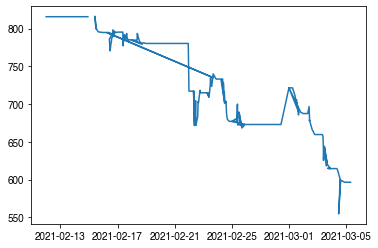

In [11]:
plt.plot(df.index, df['price_1d'])